In [6]:
import sys
import pandas as pd
import numpy as np
import pickle

sys.path.append('/home/denra/git/ml/researches/jokesclustering/') # ваш путь до корня проекта
from vector_clustering.models.kmeans_fasttext.components import FasttextVectorizer, KmeansSimpleClusterExtractor
from vector_clustering.abstract.model import Model
from vector_clustering.data.manager import (get_jokes_as_dataframe, load_pandas_csv, load, ARANEUM_FASTTEXT, 
                                            load_pickle, dump_pickle)
from sklearn.cluster import KMeans
from sklearn.externals import joblib

In [2]:
pwd

'/home/denra/git/ml/researches/jokesclustering/vector_clustering/research'

In [37]:
# jokes_vectors = load_pickle('vectors.pkl')
# max_kmeans = joblib.load('knn_fasttext.pkl')

jokes = get_jokes_as_dataframe('jokes.json')
vectorizer = FasttextVectorizer()

# jokes['cluster_id'] = max_kmeans.predict(jokes_vectors)

In [42]:
vectors = vectorizer.fit(jokes.joke_text.values)

In [43]:
joblib.dump('vectors.pkl')

(136338, 300)

In [30]:
jokes[jokes.cluster_id == 1].sample(5).joke_text.values

array(['- Государь Кот, там мыши спрашивают - чем сегодня мзду приносить? - Скажите - я сегодня сыт. Пусть не мздят.',
       'Veni, vidi, vici - пришёл, увидел, победил. Аз, буки, веди - идёшь и ищешь выпивку.',
       'Две подруги после новогодних каникул: - Ну как Новый Год встретила? - Очень даже неплохо. Ты знаешь, пятерых Дедов Морозов заказывала, четверо сбежали, а один не успел, я ему дорогу перегородила, бороду и шубу сорвала, теперь у меня будет жить до восьмого марта!',
       'Не поеду я в этом году на Кипр. В прошлом году не поехал в Таиланд, в позапрошлом - в Египет. На следующий год не знаю, куда не поеду...',
       'Из новостей: Путин сказал, что нового кризиса не будет! Как?!? Опять не будет?!? Только недавно же не было!!!'],
      dtype=object)

## Extended Agglomerative
[source](https://stackoverflow.com/questions/46027996/why-doesnt-sklearn-cluster-agglomerativeclustering-give-us-the-distances-betwee)

In [47]:
X

array([[ 1.04829186,  5.03092408],
       [-1.72056742,  2.76673089],
       [ 1.13280393,  3.87673946],
       [ 2.13274123,  1.08674492],
       [ 3.19014483,  0.17048082],
       [-2.0511805 ,  2.20787329],
       [-2.38003911,  3.89326996],
       [ 1.61137465, -0.09273457],
       [ 0.92466065,  4.50908658],
       [ 1.45131429,  4.22810872],
       [ 2.82165713,  1.63234304],
       [ 1.72330962,  4.2012082 ],
       [ 0.77877261,  1.22447296],
       [ 2.07814678,  0.80407173],
       [ 1.35678894,  4.36462484],
       [-1.7817301 ,  2.69884511],
       [-0.91175867,  3.51907219],
       [-1.70086009,  2.99605675],
       [ 2.48748562,  0.52658115],
       [ 1.19820169,  4.47062449]])

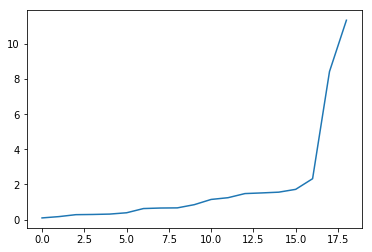

In [56]:
plt.plot(range(19), Z.T[2])
pass

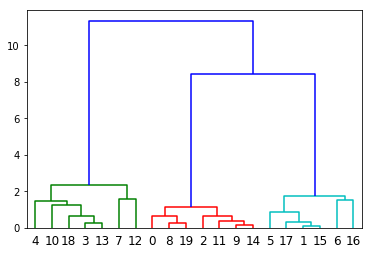

In [51]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline  

X, cl = make_blobs(n_samples=20, n_features=2, centers=3, cluster_std=0.5, random_state=0)
Z = linkage(X, method='ward')

plt.figure()
dendrogram(Z)
plt.show()

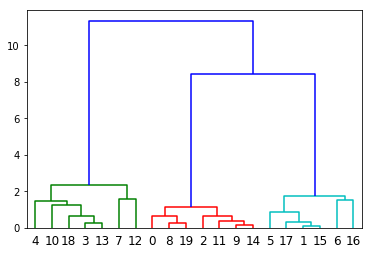

In [81]:
dendrogram_values = dendrogram(Z)

In [83]:
len(dendrogram_values['color_list'])

19

## Implementation

In [79]:
from typing import List, Union, Dict, Callable

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy

from vector_clustering.abstract.abstract_cluster_extractor import AbstractClusterExtractor
from vector_clustering.abstract.model import Model
from vector_clustering.data.manager import load, ARANEUM_FASTTEXT


class ExtendedAgglomerativeClusterExtractor(AbstractClusterExtractor):
    def __init__(self, pruning_threshold: float, affinity: Union[str, Callable]='euclidean', linkage: str='ward'):
        """
        Реализует иерархическую агломеративную кластеризацию.
        
        :param pruning_threshold: процентиль пороговое значение изменения расстояния между кластерами, 
                                  после которого прекращается нарастание кластеров
        :param affinity: норма пространства
        :param linkage: метрика для измерения расстояния между кластерами
        
        Подробнее про affinity и linkage:
          1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
          2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
        """
        super().__init__()
        
        self.affinity = affinity
        self.linkage = linkage
        self.pruning_threshold = pruning_threshold  # Также можно обрубать по слишком большому кол-ву присоединенных объектов
        self.best_iteration = None
        self.vectors = None
        self.labels_ = None

    def fit(self, vectors: numpy.ndarray):
        self.vectors = vectors
        self.linkage_matrix = linkage(vectors, metric=self.affinity, method=self.linkage)
        
        self.prune_tree()
        self.predict_labels()

    def predict_labels(self):
        dendrogram_values = dendrogram(Z)  # todo: без отрисовки
        clusters_ids, color_list = {}, dendrogram_values['color_list']
        
        
        next_label, n = 0, self.vectors.shape[0]
        self.labels_ = [None for _ in range(2 * n - 1)]  # Т.к. в худшем случае новых "клатеров" n - 1
        # todo
        for i, iter_result in enumerate(self.linkage_matrix):
            if i == self.best_iteration:
                for j in range(n):
                    if self.labels_[j] is None:
                        self.labels_[j] = next_label
                        next_label += 1
                return
            if clusters_ids.get(color_list[])
            
            obj_a, obj_b = int(iter_result[0]), int(iter_result[1])
            if obj_a is None and obj_b is None:
                self.labels_[obj_a] = next_label
                self.labels_[obj_b] = next_label
                self.labels_[n + next_label] = next_label
                next_label += 1
            elif obj_a is not None:
                self.labels_[obj_a] = self.labels_[obj_b]
            elif obj_b is not None:
                self.labels_[obj_a] = self.labels_[obj_b]
            else:
    
    def get_id(self, color, clusters_ids, next_label):
        ret

    def predict_by_nearest(self):
        raise NotImplemeted
    
    def prune_tree(self):
        distances = self.__linkage_matrix.T[2]
        diffs = [abs(distances[i] - distances[i + 1]) for i in range(len(distances) - 1)]
        diffs_sum = sum(diffs)
        
        for i, diff in enumerate(diffs):
            if diff / diff * 100 >= self.pruning_threshold:
                self.best_iteration = i - 1  # Обработать ситуацию <= 0
    
    def plot_dendrogram(self):
        return dendrogram(self.linkage_matrix)
    
    def plot_iteration_distance_dependency(self, iter_count: int):
        """
        :param iter_count: 1 <= iter_count <= len(vectors) - 1
        """
        return plt.plot(range(iter_count), self.linkage_matrix.T[2])
        
    def demo(self, n_examples, texts=None) -> Dict[Union[str, int], List[str]]:
        labels = self.__model.labels_
        demo_set = {label_id : [] for label_id in range(self.__model.cluster_centers_.shape[0])}
        for label_id in demo_set:
            satisfy_texts = texts[labels == label_id]
            demo_set[label_id] = satisfy_texts[0:min(n_examples, satisfy_texts.shape[0])]
        return demo_set

    def get_model(self):
        return self


# if __name__ == '__main__':
#     texts = numpy.array(['my name is max', 'your name is max'])
#     vectorizer = FasttextVectorizer()
#     cluster_extractor = KmeansSimpleClusterExtractor()

#     m = Model(vectorizer, cluster_extractor)
#     print(m.fit(texts))

IndentationError: expected an indented block (<ipython-input-79-236b18e4f6dd>, line 50)